In [410]:
from IPython.display import display
display({'text/html': '<h1>Topic5 Assignment</h1>', 'text/plain': 'Topic5 Assignment'}, raw=True)
display({'text/html': '<h1>Anoop Korappath</h1>', 'text/plain': 'Anoop Korappath'}, raw=True)
display({'text/html': '<h1>11/29/2021</h1>', 'text/plain': '11/29/2021'}, raw=True)

Topic5 Assignment

Anoop Korappath

11/29/2021

# Part 1

In [411]:
import numpy as np
import pandas as pd

data = pd.read_csv('drive_dataset.csv')
data.head()

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['x1'] = labelencoder.fit_transform(data['x1'])
data['x2'] = labelencoder.fit_transform(data['x2'])
data['x3'] = labelencoder.fit_transform(data['x3'])
data['y'] = labelencoder.fit_transform(data['y'])
X=data.iloc[:,0:3]
Y=data.iloc[:,3]

#### a) Calculate the information gain for x1, x2 and x3.

In [412]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

def InfoGain(data,split_attribute_name,target_name):
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain


print("Information Gain for x1(Temperature)",InfoGain(data,'x1','y'))
print("Information Gain for x2(Wind)",InfoGain(data,'x2','y'))
print("Information Gain for x3(Traffic Jam)",InfoGain(data,'x3','y'))

Information Gain for x1(Temperature) 0.02922256565895487
Information Gain for x2(Wind) 0.04812703040826949
Information Gain for x3(Traffic Jam) 0.15183550136234159


#### b) Choose the root node for the decision tree.

##### Since the information gain of Traffic Jam is the highest , we can choose Traffic Jam as the root node.

#### c) Plot a partial decision tree from root node along with training examples sorted to each of its descendent nodes.

[Text(775.0, 1006.6666666666666, 'Traffic <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = yes'),
 Text(387.5, 604.0, 'Wind <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = no'),
 Text(193.75, 201.33333333333326, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = no'),
 Text(581.25, 201.33333333333326, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = no'),
 Text(1162.5, 604.0, 'Wind <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = yes'),
 Text(968.75, 201.33333333333326, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = yes'),
 Text(1356.25, 201.33333333333326, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = yes')]

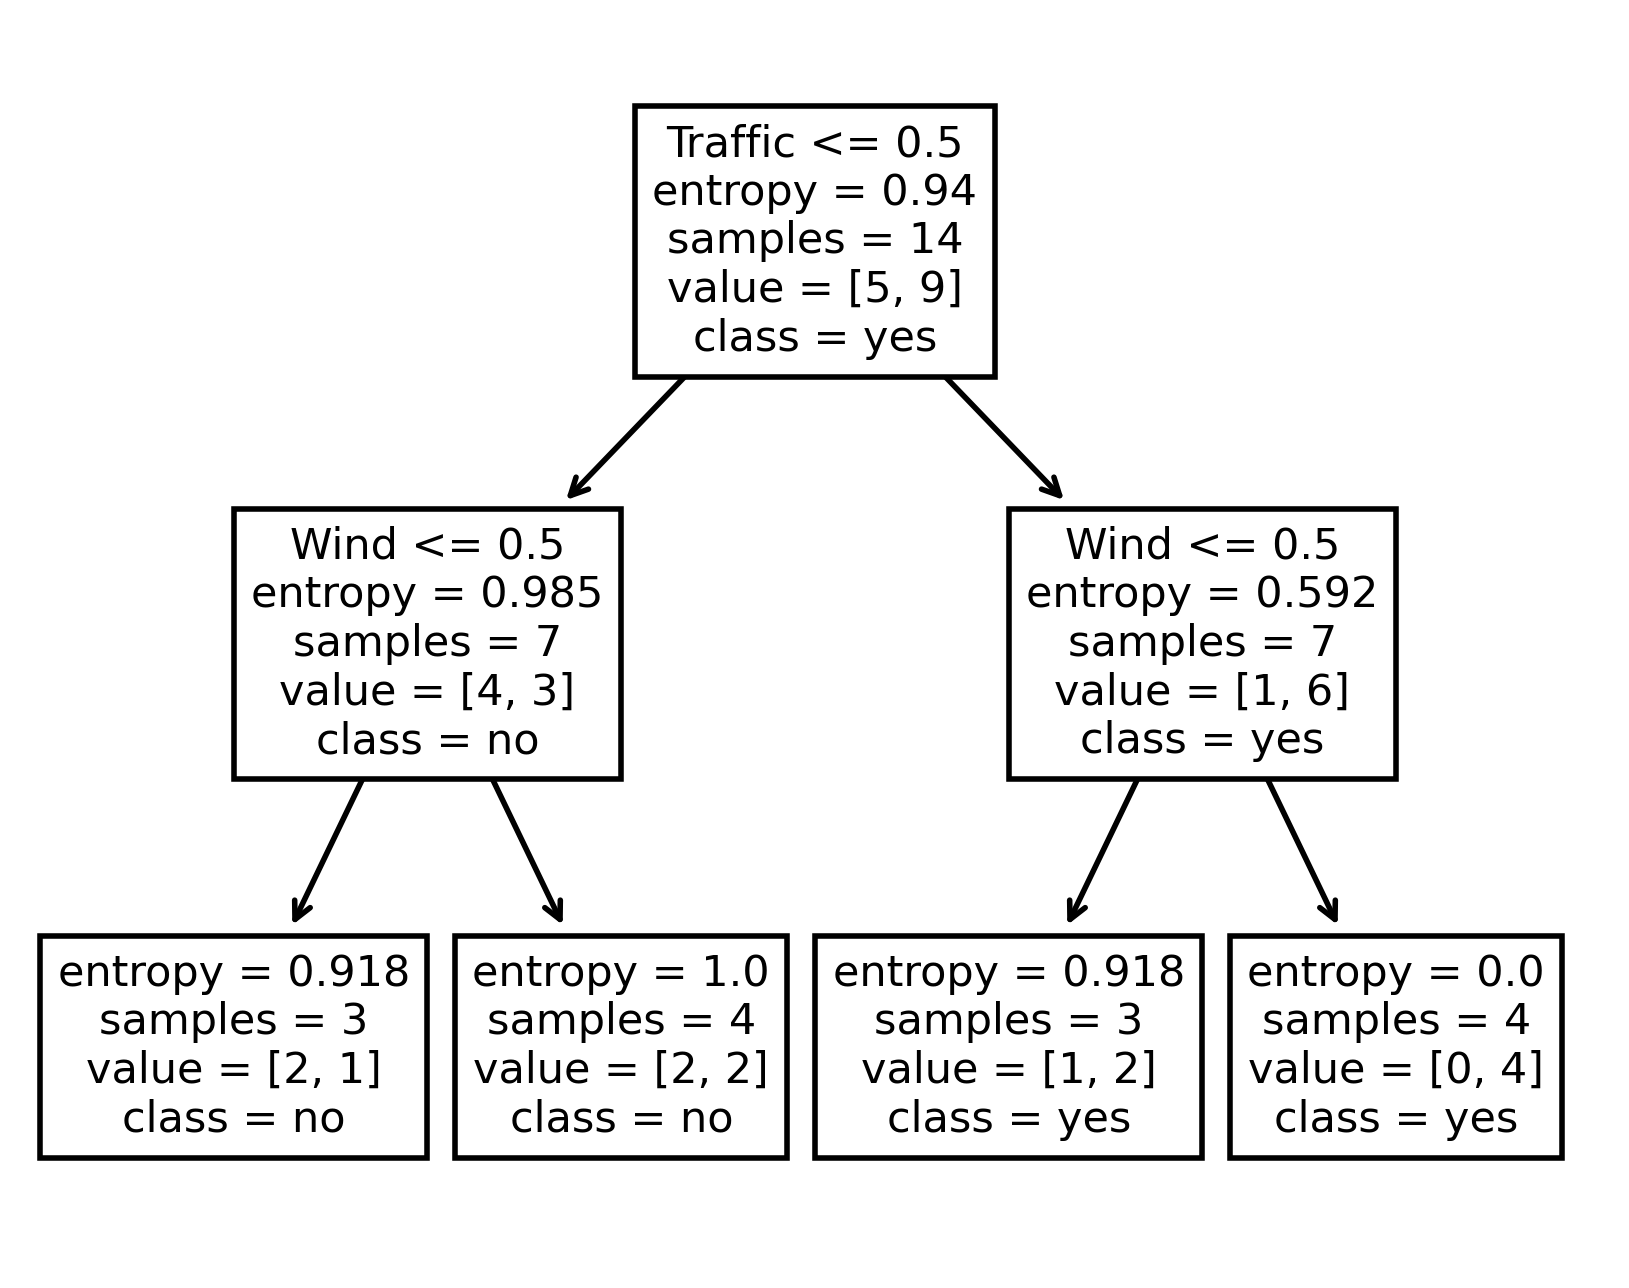

In [413]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2,
                            random_state = 0)
clf.fit(X, Y)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=400)
plot_tree(clf,feature_names = ['Temperature','Wind','Traffic'],class_names=['no','yes'])

#### d) You are required to continue with the decision-tree growing process until all nodes are pure (they contain examples that all have the same classification).

##### Pure node is a node wherein all the datapoints belong to the same class and thus it is very easy to make the prediction at such node.
##### Larger the depth of the tree more are the chances of variance(overfitting).
##### Whereas smaller the depth of the tree more are the chances of bias tree(underfitting)

#### e) Will it be possible to reach this situation for the given dataset? If not, why not? (Hint: Look for inconsistencies in the given dataset.)

##### It will be difficult to reach such a situation in this case because the dataset is not balanced.
##### Decision trees implementations normally use Gini index or Entropy for finding splits. These are functions that are maximized when the classes in a node are perfectly balanced - and therefore reward splits that move away from this balance.

#### f) Summarize the entire work in a technical report

#### Decision trees are powerful and popular tools for classification and prediction. Decision trees represent rules, which can be understood by humans and used in knowledge system such as database.
#### A decision tree is composed of internal decision nodes decision node and terminal leaves. Each decision node m implements a test function fm(x) with discrete outcomes labelling the branches. Given an input, at each node, a test is applied and one of the branches is taken depending on the outcome. This process starts at the root and is repeated recursively until a leaf node is hit, at which point the value written in the leaf constitutes the output.
#### A decision tree is also a nonparametric model in the sense that we do not assume any parametric form for the class densities and the tree structure is not fixed a priori but the tree grows, branches and leaves are added, during learning depending on the complexity of the problem inherent in the data. Decision tree is a classifier in the form of a tree structure which consists of:
#####     *) Decision node: specifies a test on a single attribute.
#####     *) Leaf node: indicates the value of the target attribute.
#####     *) Edge: split of one attribute
#####     *) Path: a disjunction of test to make the final decision.

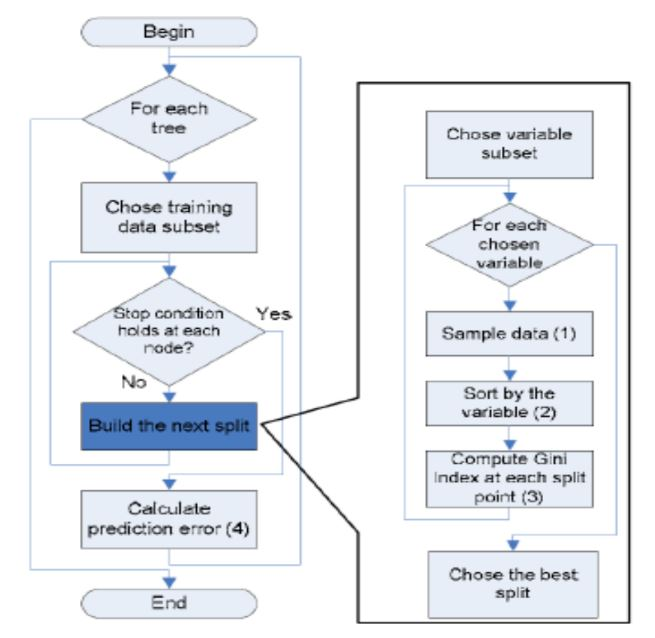

In [414]:
from IPython.display import Image
Image(filename='C:\\Users\\Anoops\\Downloads\\1.jpg')

#### For this data set, label encoding was done as this approach is very simple and it involves converting each value in a column to a number.
#### Decision Trees require all input variables and output variables to be numeric. That's why we need to encode them.
#### After encoding,the DecisionTreeClassifier function was used.
#### max_depth of 2 was given and random state of 0 was provided.
#### The criteria was given as entropy . This determines the quality of the split and in this case information gain will be used.
#### The classes in the data set is imbalanced and we have very small number of rows.

# Part 2

#### a) Explain how you will fuzzify the attributes x1, x2 and x3.

##### Fuzzy Decision Tree combines fuzzy representation, and its approximate reasoning, with symbolic decision trees. As such, they provide for handling of language related uncertainty, noise, missing or faulty features, robust behavior, while also providing comprehensible knowledge interpretation.
##### While classical mathematics is distinguished by its precision, in specific application scenarios, fuzziness can have an advantage over precision. For example, for the concept of “very old,” a 50-year-old or younger person may consider 75 to be in the very old range, but a 90-year-old person may not consider a 75-year-old person to be very old, so the concept of “very old” does not lend itself to an exact interval. Therefore, there are times when absolute precision does not lend itself to practical application. Also, ambiguity is different from randomness, for example, if we toss a coin, it will either be tails or heads; their occurrence is random and uncertain, but the event itself is certain.

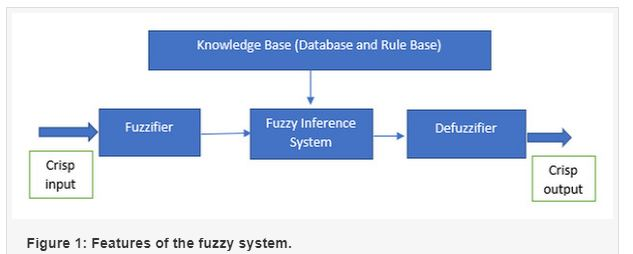

In [415]:
from IPython.display import Image
Image(filename='C:\\Users\\Anoops\\Downloads\\2.jpg')

#### b) Choose the root node for the fuzzy decision tree and defend your choice.
##### The root node is the Traffic Jam.

#### c) Plot a partial fuzzy decision tree from root node along with training examples sorted to each of its descendent nodes. Assume the dataset to be crisp, i.e., all membership functions satisfy:µD(s(i)) = 1

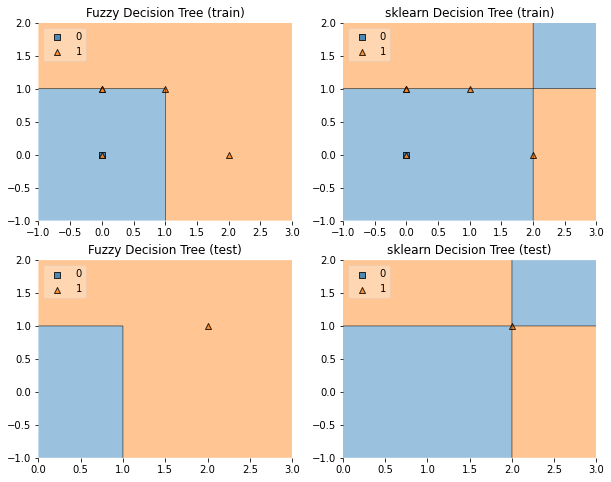

In [416]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from fuzzytree import FuzzyDecisionTreeClassifier

value = 1.5
width = 0.75
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=42)
clf_fuzz = FuzzyDecisionTreeClassifier().fit(X_train, y_train)
clf_sk = DecisionTreeClassifier().fit(X_train, y_train)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))
labels = ["Fuzzy Decision Tree", "sklearn Decision Tree"]

feature_values = {i:1 for i in range(2, 3)}
feature_width = {i:1 for i in range(2, 3)}


for clf, lab, grd in zip([clf_fuzz, clf_sk], labels, [[0, 0], [0, 1]]):
    plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train, y=y_train, clf=clf,
                          filler_feature_values=feature_values,
                      filler_feature_ranges=feature_width,
                      legend=2)
    plt.title("%s (train)" % lab)

    plt.subplot(gs[grd[0] + 1, grd[1]])
    plot_decision_regions(X=X_test, y=y_test, clf=clf,
                          filler_feature_values=feature_values,
                      filler_feature_ranges=feature_width,
                      legend=2)
    plt.title("%s (test)" % lab)

plt.show()

#### The above plot shows a comparison between the fuzzy decision tree and the normal decision tree for the train and test data sets.

#### d) As with Part 1, create a second report, detailing your approach to fuzzification of the decision tree

#### Fuzzy decision trees are more efficient for treating learning data of mixed type, including both numerical and categorical data. They are more robust in tolerating imprecise, conflicting, and missing information.
#### Decision trees based on fuzzy set theory combines the advantages of good comprehensibility of decision trees and the ability of fuzzy representation to deal with inexact and uncertain information.
#### An apparent advantage of fuzzy decision trees is that they use the same routines as symbolic decision trees (but with fuzzy representation). This allows for utilization of the same comprehensible tree structure for knowledge understanding and verification. This also allows more robust processing with continuously gradual outputs
#### Moreover, one may easily incorporate rich methodologies for dealing with missing features and incomplete trees. For example, suppose that the inference descends to a node, which does not have a branch (maybe due to tree pruning, which often improves generalization properties) for the corresponding feature of the sample. This dandling feature can be fuzziffied and then its match to fuzzy restrictions associated with the available branches provides better than uniform discernibility among those children.
#### Fuzzy decision trees can process data expressed with symbolic, numerical values (more information) and fuzzy terms. Because fuzzy restrictions are evaluated using fuzzy membership functions, this process provides a linkage between continuous domain values and abstract features.
#### Fuzzy sets and approximate reasoning allow for processing of noisy, inconsistent and incomplete data. It is more accurate than standard decision trees.

# References
#### Larose, C. D., &amp; Larose, D. T. (2019). Data science using Python and R. Wiley.
#### Gopal, M. (2019). Applied machine learning. McGraw-Hill Education.
#### Banakar, A., Zareiforoush, H., Baigvand, M., Montazeri, M., Khodaei, J., &amp; Behroozi-Khazaei, N. (2016). Combined application of decision tree and fuzzy logic techniques for intelligent grading of dried figs. Journal of Food Process Engineering, 40(3). https://doi.org/10.1111/jfpe.12456
#### Cózar, J., Marcelloni, F., Gámez, J.A. et al. Building efficient fuzzy regression trees for large scale and high dimensional problems. J Big Data 5, 49 (2018). https://doi.org/10.1186/s40537-018-0159-y